# Exploratory data analysis of time series of EURIBOR rates - part 1

### Dataset info
This notebook contains first part of the exploratory data analysis of time series of EURIBOR rates published by EMMI. 
The data set used is available as an R data-only package here: https://github.com/wegar-2/euribor.historical.data 

Suffice it to say here that I do not own the data and that the source of the time series is the EMMI website here: https://www.emmi-benchmarks.eu/euribor-org/euribor-rates.html 

Further information on the data used and disclaimers related to the ownership of the data is also provided in the link above.

Time range covered by the data: 1998-12-30 until 2021-07-14.

### Analysis

The purpose of this analysis (part 1 of 2) is to obtain primary insights into the properties of the EURIBOR time series before moving on to modeling. Very basic plots are produced and some descriptive statistics are calculated and reviewed. Part 1 is assumed to be more qualitative whereas part 2 is expected to be more quantitative.

In [2]:
library(tidyverse)
library(data.table)
library(magrittr)
library(lubridate)
library(zoo)
library(scales)

In [3]:
# 0. loading package with data - from non-CRAN package;-------------------------
#    repo here: https://github.com/wegar-2/euribor.historical.data
library(euribor.historical.data)
dtData <- data.table::copy(dtEuribor)
View(head(dtData))
View(tail(dtData))
dtMeltedData <- data.table::melt.data.table(
  data = dtData, id.vars = "quote_date", measure.vars = colnames(dtData)[2:6],
  variable.name = "which_euribor", value.name = "euribor_value")
# switch from rates in percentages to fractions
dtMeltedData$euribor_value <- dtMeltedData$euribor_value/100

quote_date,euribor_1w,euribor_1m,euribor_3m,euribor_6m,euribor_12m
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1998-12-30,3.251,3.258,3.248,3.230,3.215
1998-12-31,3.245,3.254,3.245,3.233,3.213
1999-01-01,3.245,3.254,3.245,3.233,3.213
1999-01-04,3.249,3.242,3.234,3.223,3.209
1999-01-05,3.241,3.233,3.222,3.204,3.187
1999-01-06,3.240,3.226,3.214,3.197,3.176


quote_date,euribor_1w,euribor_1m,euribor_3m,euribor_6m,euribor_12m
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2021-07-07,-0.575,-0.554,-0.547,-0.511,-0.491
2021-07-08,-0.568,-0.556,-0.546,-0.515,-0.493
2021-07-09,-0.564,-0.552,-0.543,-0.514,-0.494
2021-07-12,-0.571,-0.549,-0.543,-0.511,-0.493
2021-07-13,-0.565,-0.560,-0.546,-0.513,-0.490
2021-07-14,-0.573,-0.559,-0.546,-0.513,-0.488


In [12]:
# 1. start with line plot
options(repr.plot.width=15, repr.plot.height=12)
plotStdTheme <- theme(
      legend.position = "bottom",
      plot.title = element_text(size = 24),
      axis.title = element_text(size = 17),
      legend.text = element_text(size = 17),
      plot.subtitle = element_text(size = 16),
      legend.title = element_text(size = 16),
      axis.text = element_text(size = 17)
  ) 
plotHistory <- ggplot(data = dtMeltedData,
       mapping = aes(x = quote_date, y = euribor_value, color = which_euribor)) +
  geom_line() + theme_bw() +
  theme(legend.position = "bottom") +
  xlab(label = "Quote date") + ylab(label = "EURIBOR rate value") +
  scale_y_continuous(labels = scales::percent) +
  ggtitle(label = "EURIBOR rates - historical values",
          subtitle = "EMMI data, 1998-2021") +
  scale_color_discrete(
    name = "EURIBOR rates: ",
    labels = c("1 week", "1 month", "3 months", "6 months", "12 months")
  ) + scale_x_date(breaks = "3 years") + plotStdTheme

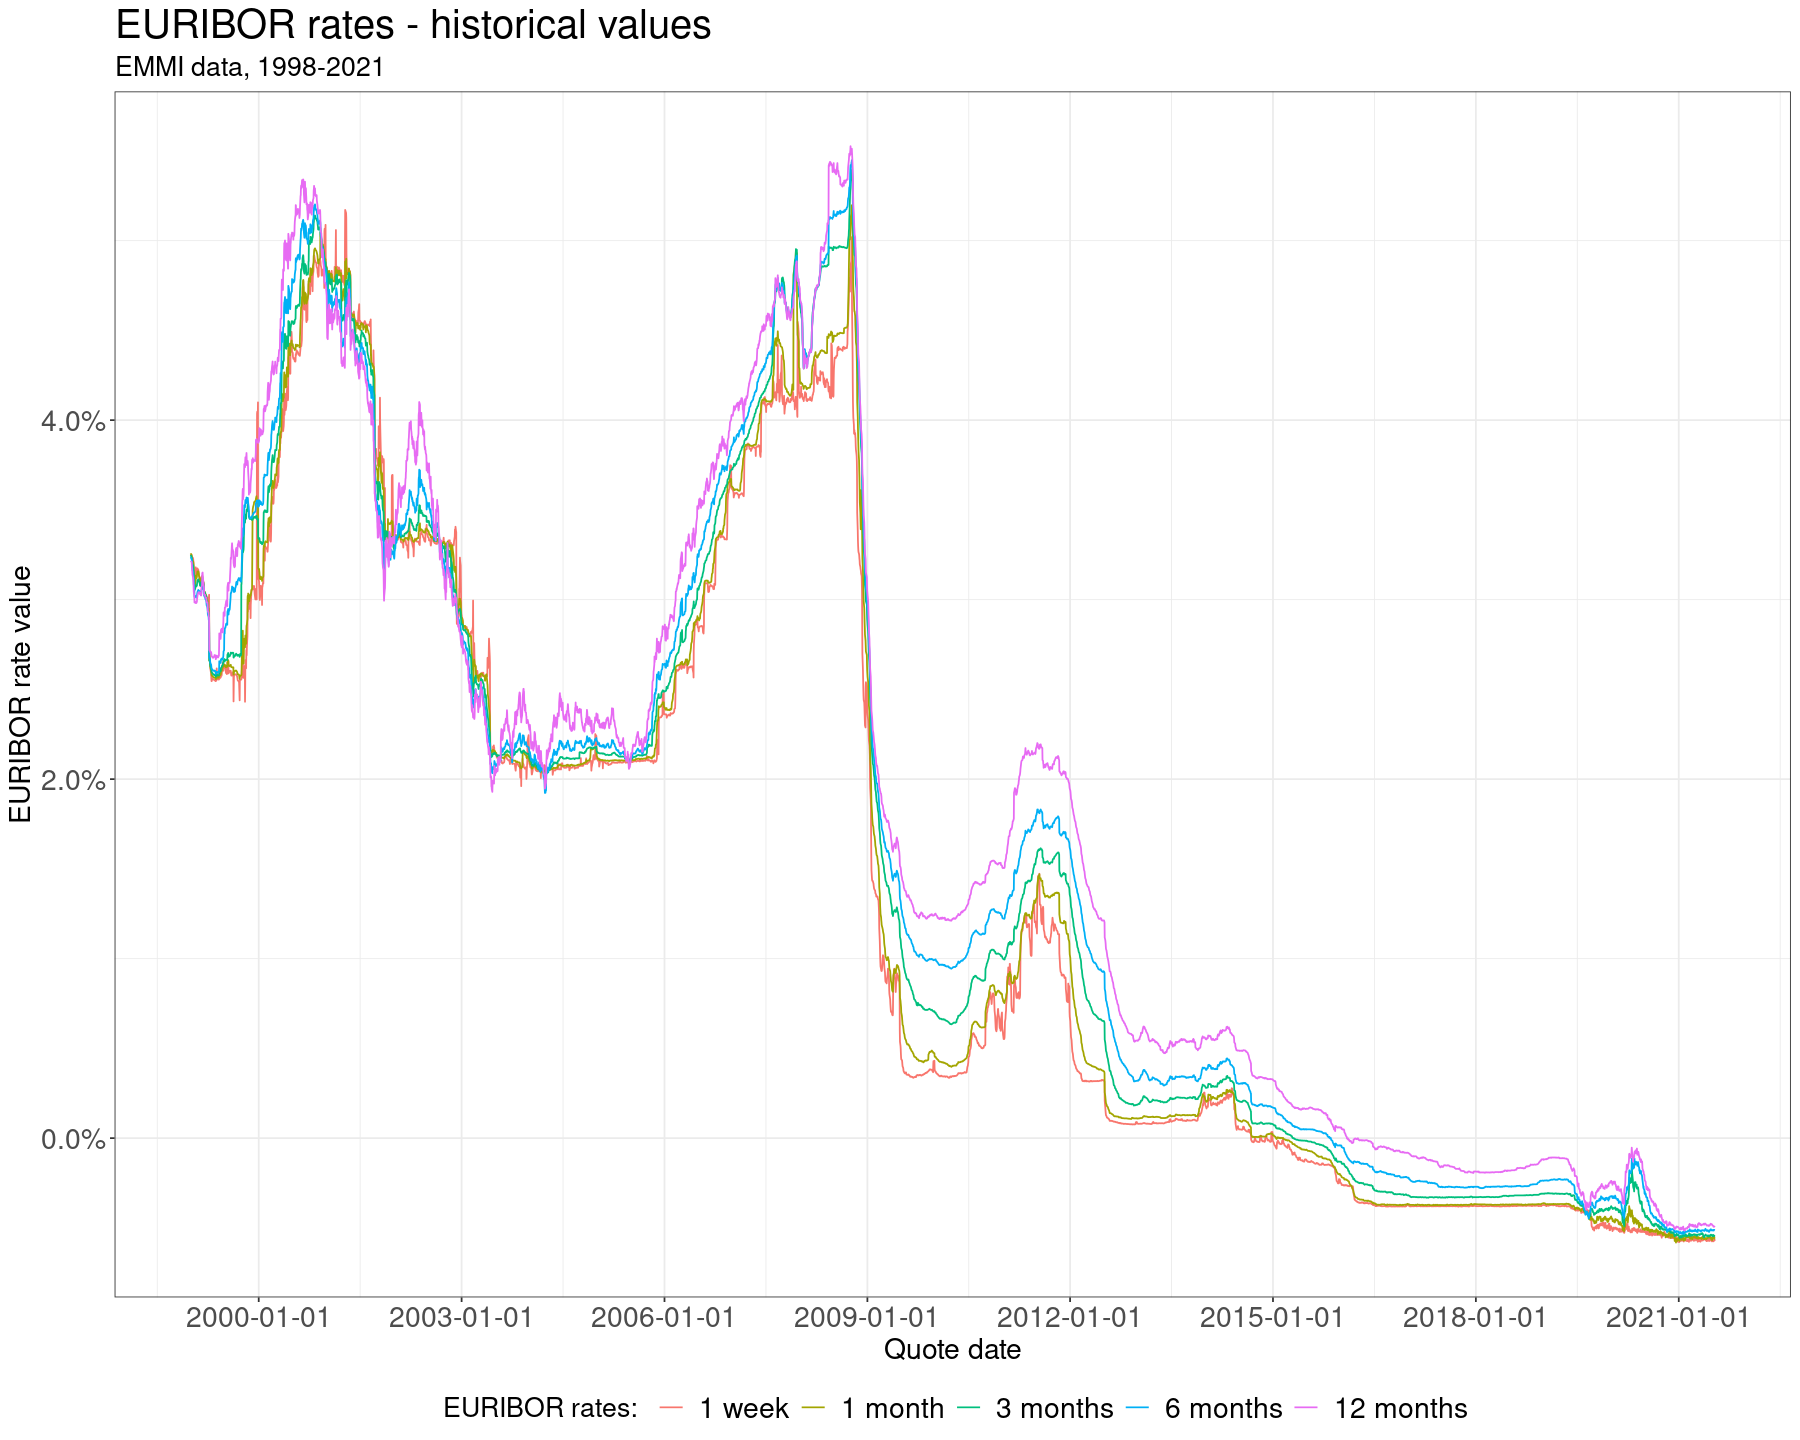

In [13]:
plotHistory

As a **very rough** approximation one can easily distingush four 'regimes' of the interest rates over the course of the analyzed period by mixing the interest rates value and basic economic facts. 

1. Period before the World Financial Crisis (WFC) 2007-2008: here, it is taken to be the period where interest rates were still positive and reasonably far from the zero level. We can observe two cycles of interest rates rises in the plot. To keep things simple, this period is taken to be the time before the year 2007.
2. The period of the WFC and its immediate aftermath: for simplicity this is taken to be the three years 2007-2009. It is easy to spot interest rates plummeting during this period in the chart above.
3. The period of the European Debt crisis - here it is assumed to last throughout 2010 until 2013. There was a short period of interest rates rising towards 1.5-2.0% around H2Y2011 which was immediately succeeded by sharp drop of interest rates to the levels 0.0-0.5%.
4. The post-crises period 2014-2021. Characterized by relatively stable rates that moved into negative territory around 2015-2016.

Needless to say, the classification given above is based on common sense and Economics 101 rather than on hard statistical evidence (more of it later). As I said - it is to serve as an *approximation* only to keep things functional. More detailed discussion of how the proper periodization of the interest rates regimes from the macroeconomic viewpoint should look like is left to economists and economic historians.

In [17]:
# 2. inspect more closely period before Financial Crisis 2007-2008 -------------
# definded as time before year 2007
dtMeltedDataBeforeCrisis <- dtMeltedData[lubridate::year(quote_date) < 2007, ]
plotHistoryBeforeCrisis <- ggplot(data = dtMeltedDataBeforeCrisis,
                      mapping = aes(x = quote_date, y = euribor_value, color = which_euribor)) +
  geom_line() + theme_bw() +
  theme(legend.position = "bottom") +
  xlab(label = "Quote date") + ylab(label = "EURIBOR rate value") +
  scale_y_continuous(labels = scales::percent) +
  ggtitle(label = "EURIBOR rates - years 1998-2006 [before Financial Crisis]",
          subtitle = "EMMI data") +
  scale_color_discrete(
    name = "EURIBOR rates: ",
    labels = c("1 week", "1 month", "3 months", "6 months", "12 months")
  ) + scale_x_date(breaks = "1 year") + plotStdTheme

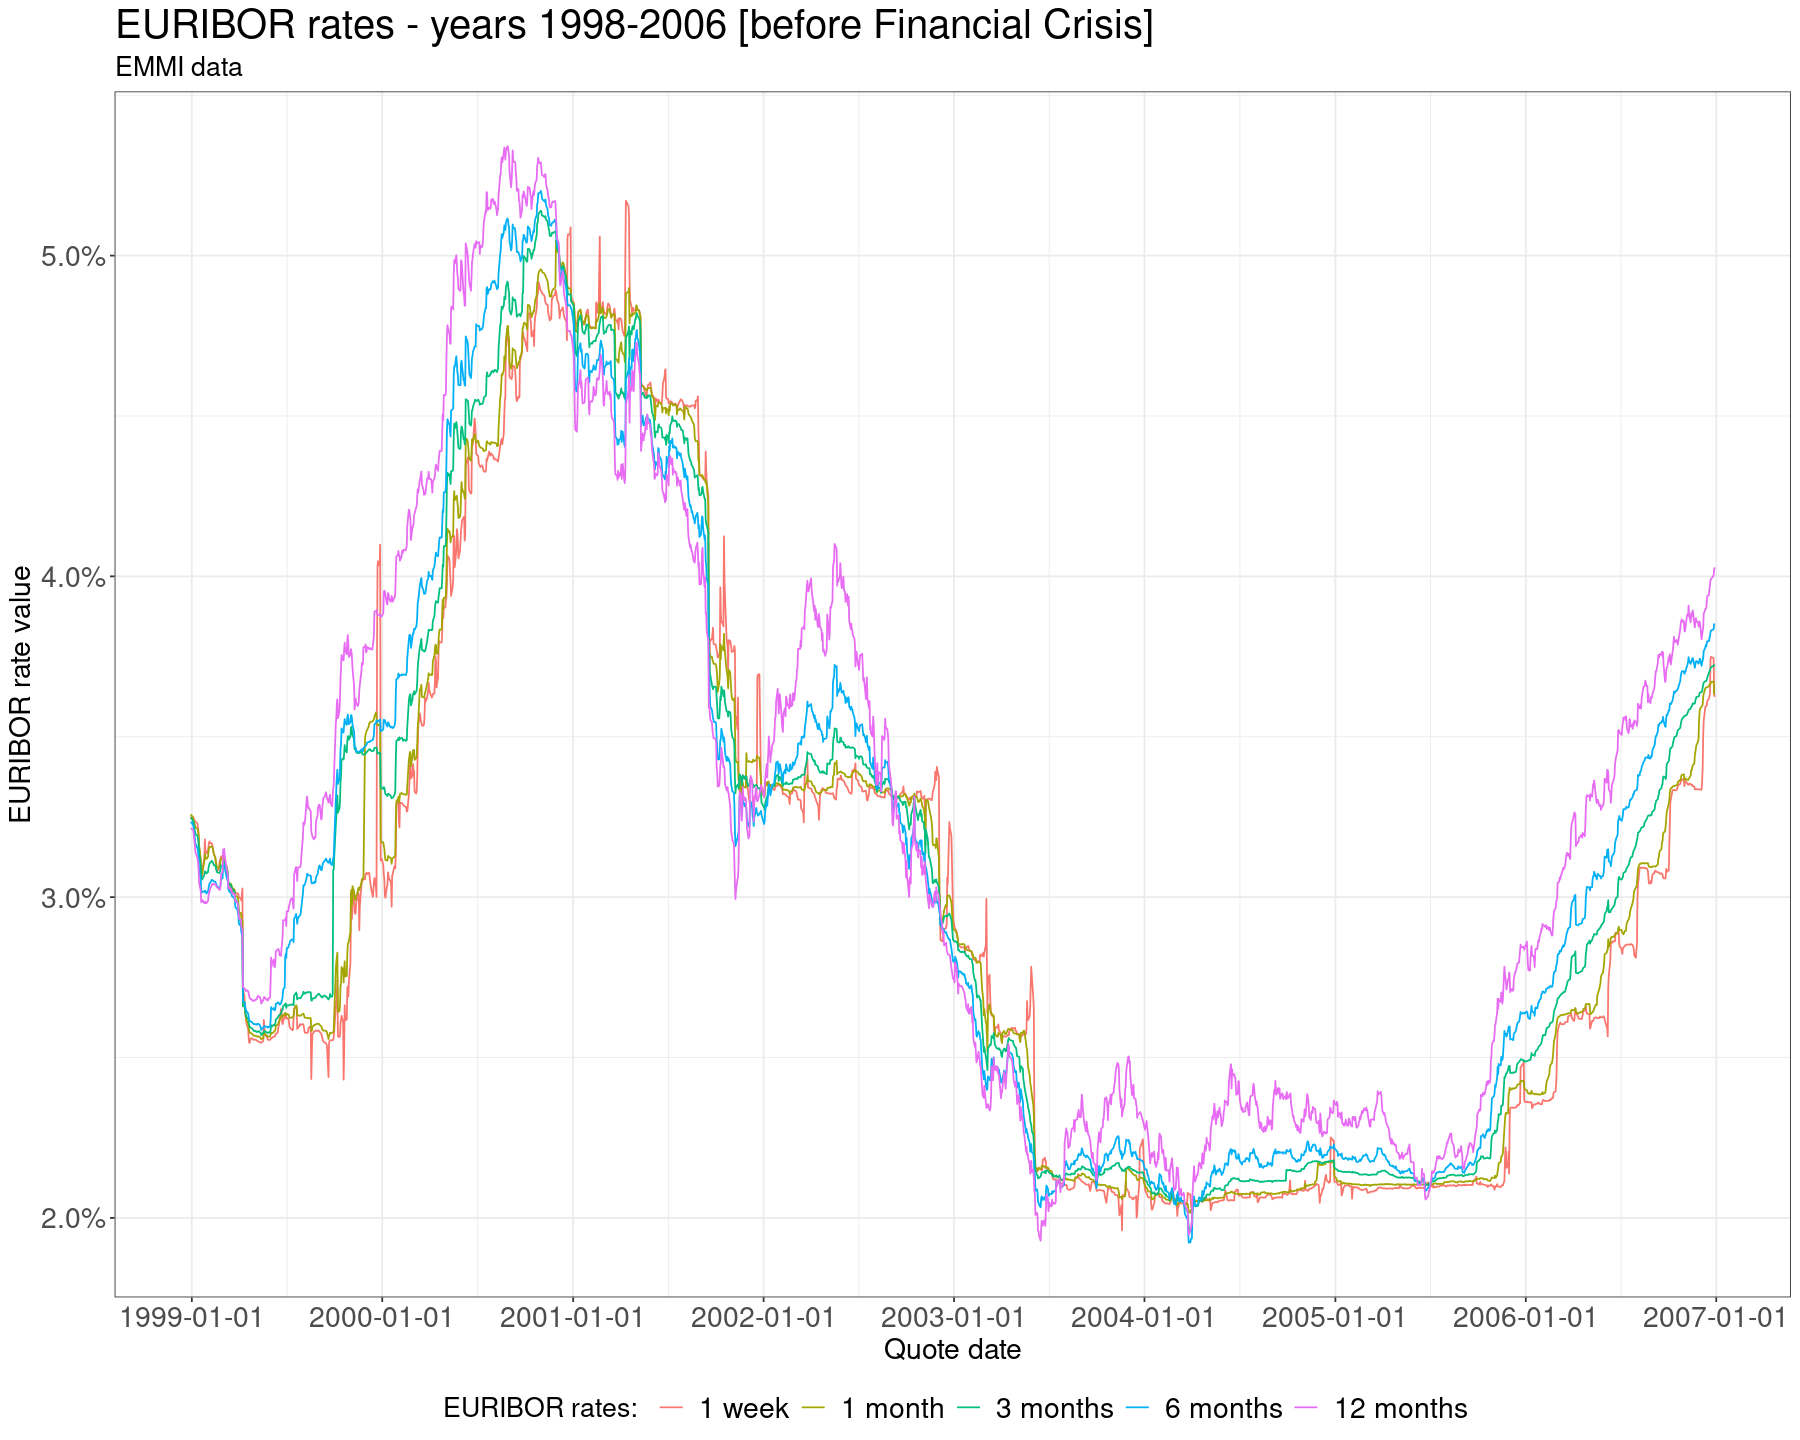

In [18]:
plotHistoryBeforeCrisis

In [20]:
# 3. inspect more closely period of Financial Crisis 2007-2009 -----------------
dtMeltedDataDuringCrisis <- dtMeltedData[lubridate::year(quote_date) %in% c(2007, 2008, 2009), ]
plotHistoryDuringCrisis <- ggplot(data = dtMeltedDataDuringCrisis,
                                  mapping = aes(x = quote_date, y = euribor_value, color = which_euribor)) +
  geom_line() + theme_bw() +
  theme(legend.position = "bottom") +
  xlab(label = "Quote date") + ylab(label = "EURIBOR rate value") +
  scale_y_continuous(labels = scales::percent, limits = c(0.00, 0.06),
                     breaks = seq(0.00, 0.06, 0.01)) +
  ggtitle(label = "EURIBOR rates - years 2007-2009 [during Financial Crisis]",
          subtitle = "EMMI data") +
  scale_color_discrete(
    name = "EURIBOR rates: ",
    labels = c("1 week", "1 month", "3 months", "6 months", "12 months")
  ) + scale_x_date(breaks = "6 months") + plotStdTheme

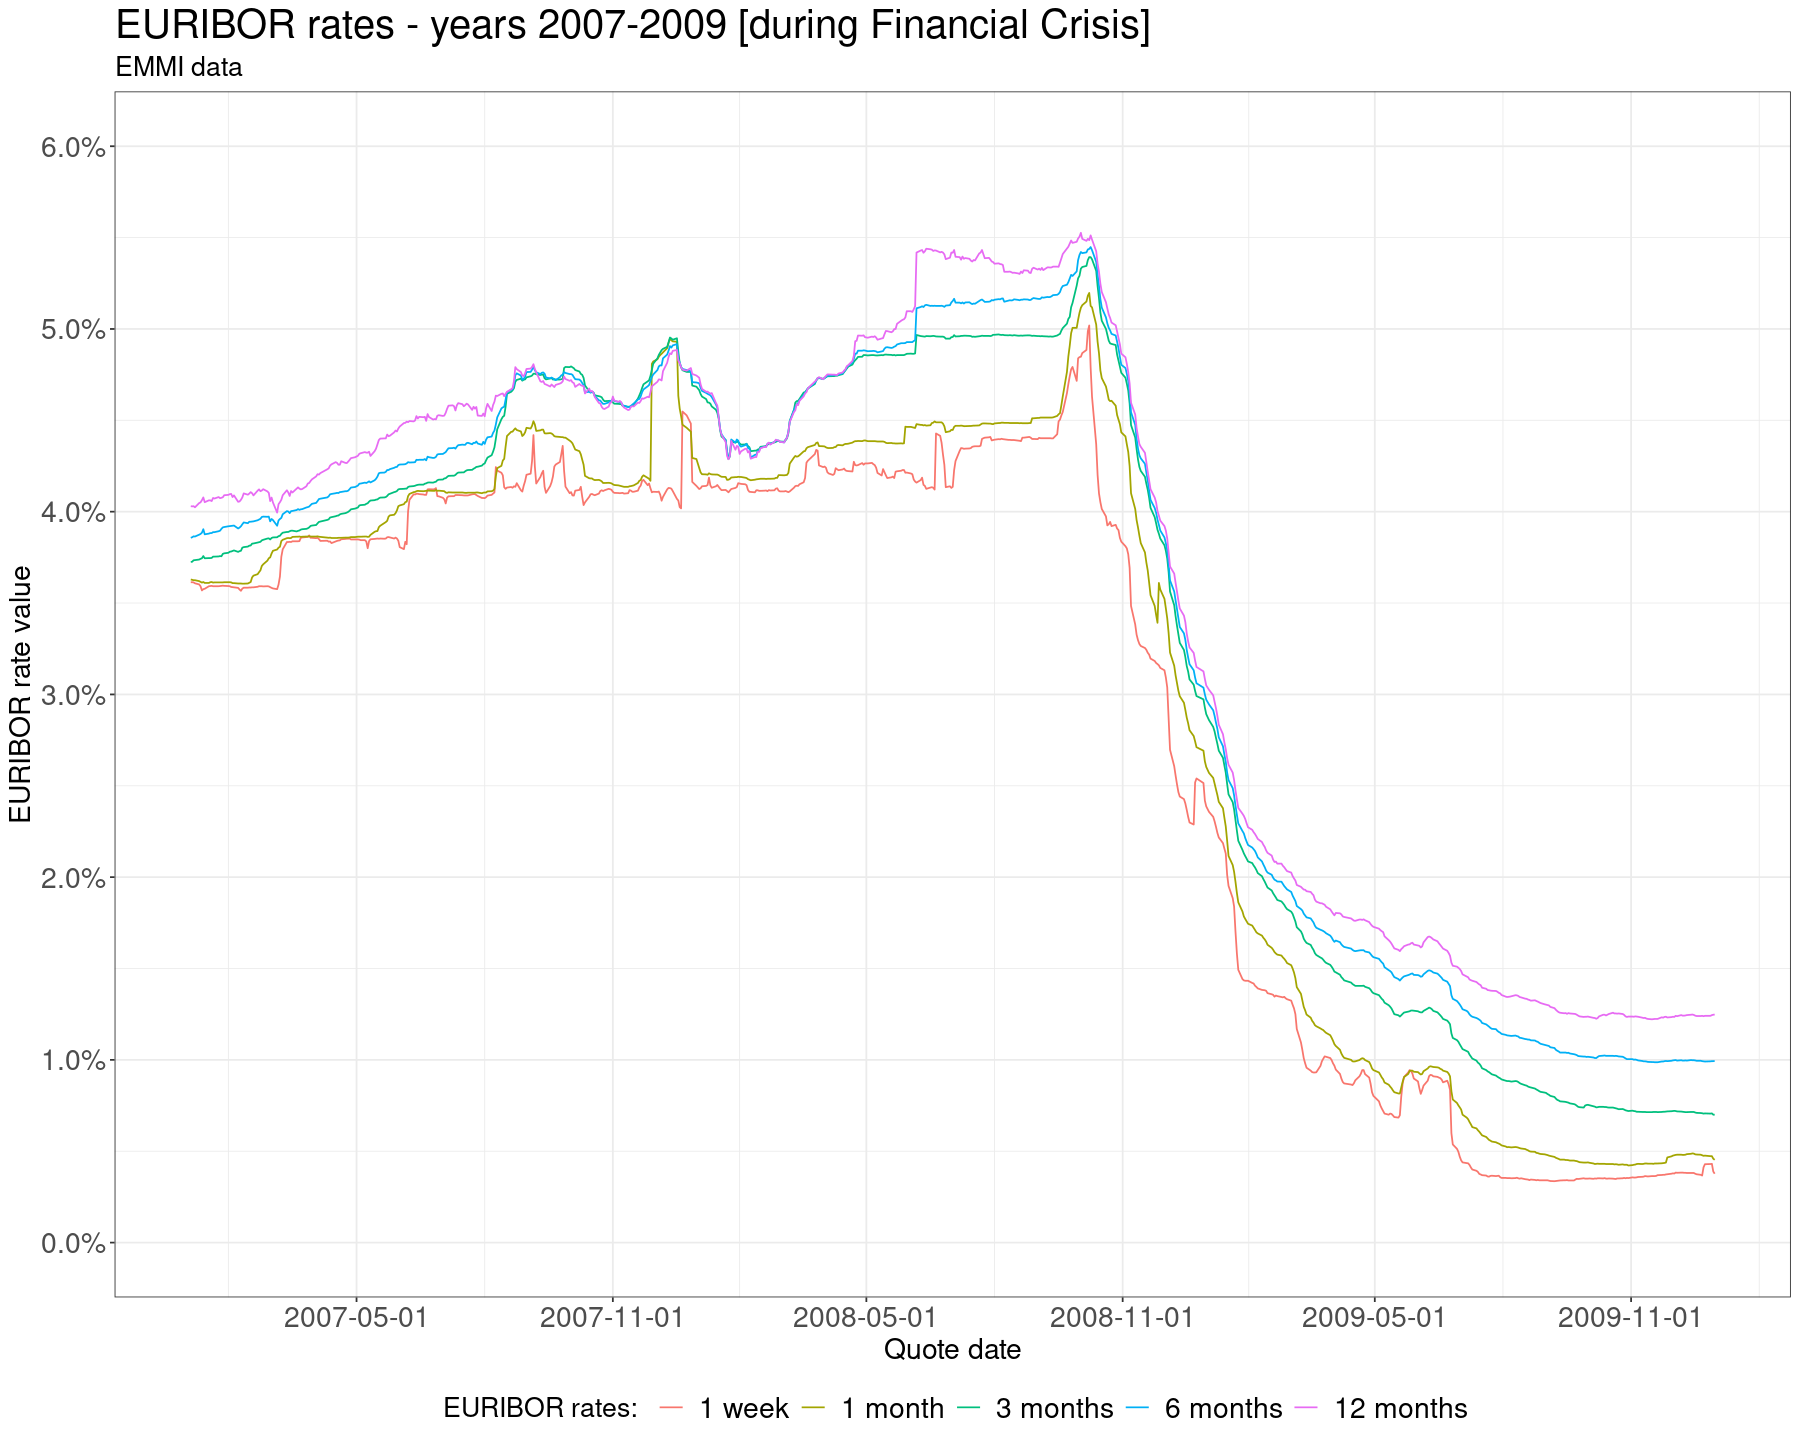

In [21]:
plotHistoryDuringCrisis

In [22]:
# 3. inspect more closely period of European Debt Crisis 2010-2013 -------------
dtMeltedDataDuringEuroDebtCrisis <-
  dtMeltedData[lubridate::year(quote_date) %in% c(2010, 2011, 2012, 2013), ]
plotHistoryDuringEuroDebtCrisis <- ggplot(
  data = dtMeltedDataDuringEuroDebtCrisis,
  mapping = aes(x = quote_date, y = euribor_value, color = which_euribor)) +
  geom_line() + theme_bw() +
  theme(legend.position = "bottom") +
  xlab(label = "Quote date") + ylab(label = "EURIBOR rate value") +
  scale_y_continuous(labels = scales::percent, limits = c(0.00, 0.0225),
                     breaks = seq(0.00, 0.0225, 0.005)) +
  ggtitle(label = "EURIBOR rates - years 2010-2013 [during European Debt Crisis]",
          subtitle = "EMMI data; rate 0.0% marked with dashed black line") +
  scale_color_discrete(
    name = "EURIBOR rates: ",
    labels = c("1 week", "1 month", "3 months", "6 months", "12 months")
  ) + scale_x_date(breaks = "8 months") +
  geom_hline(yintercept = 0.00, color = "black", linetype = "dashed", size = 1.2) + plotStdTheme

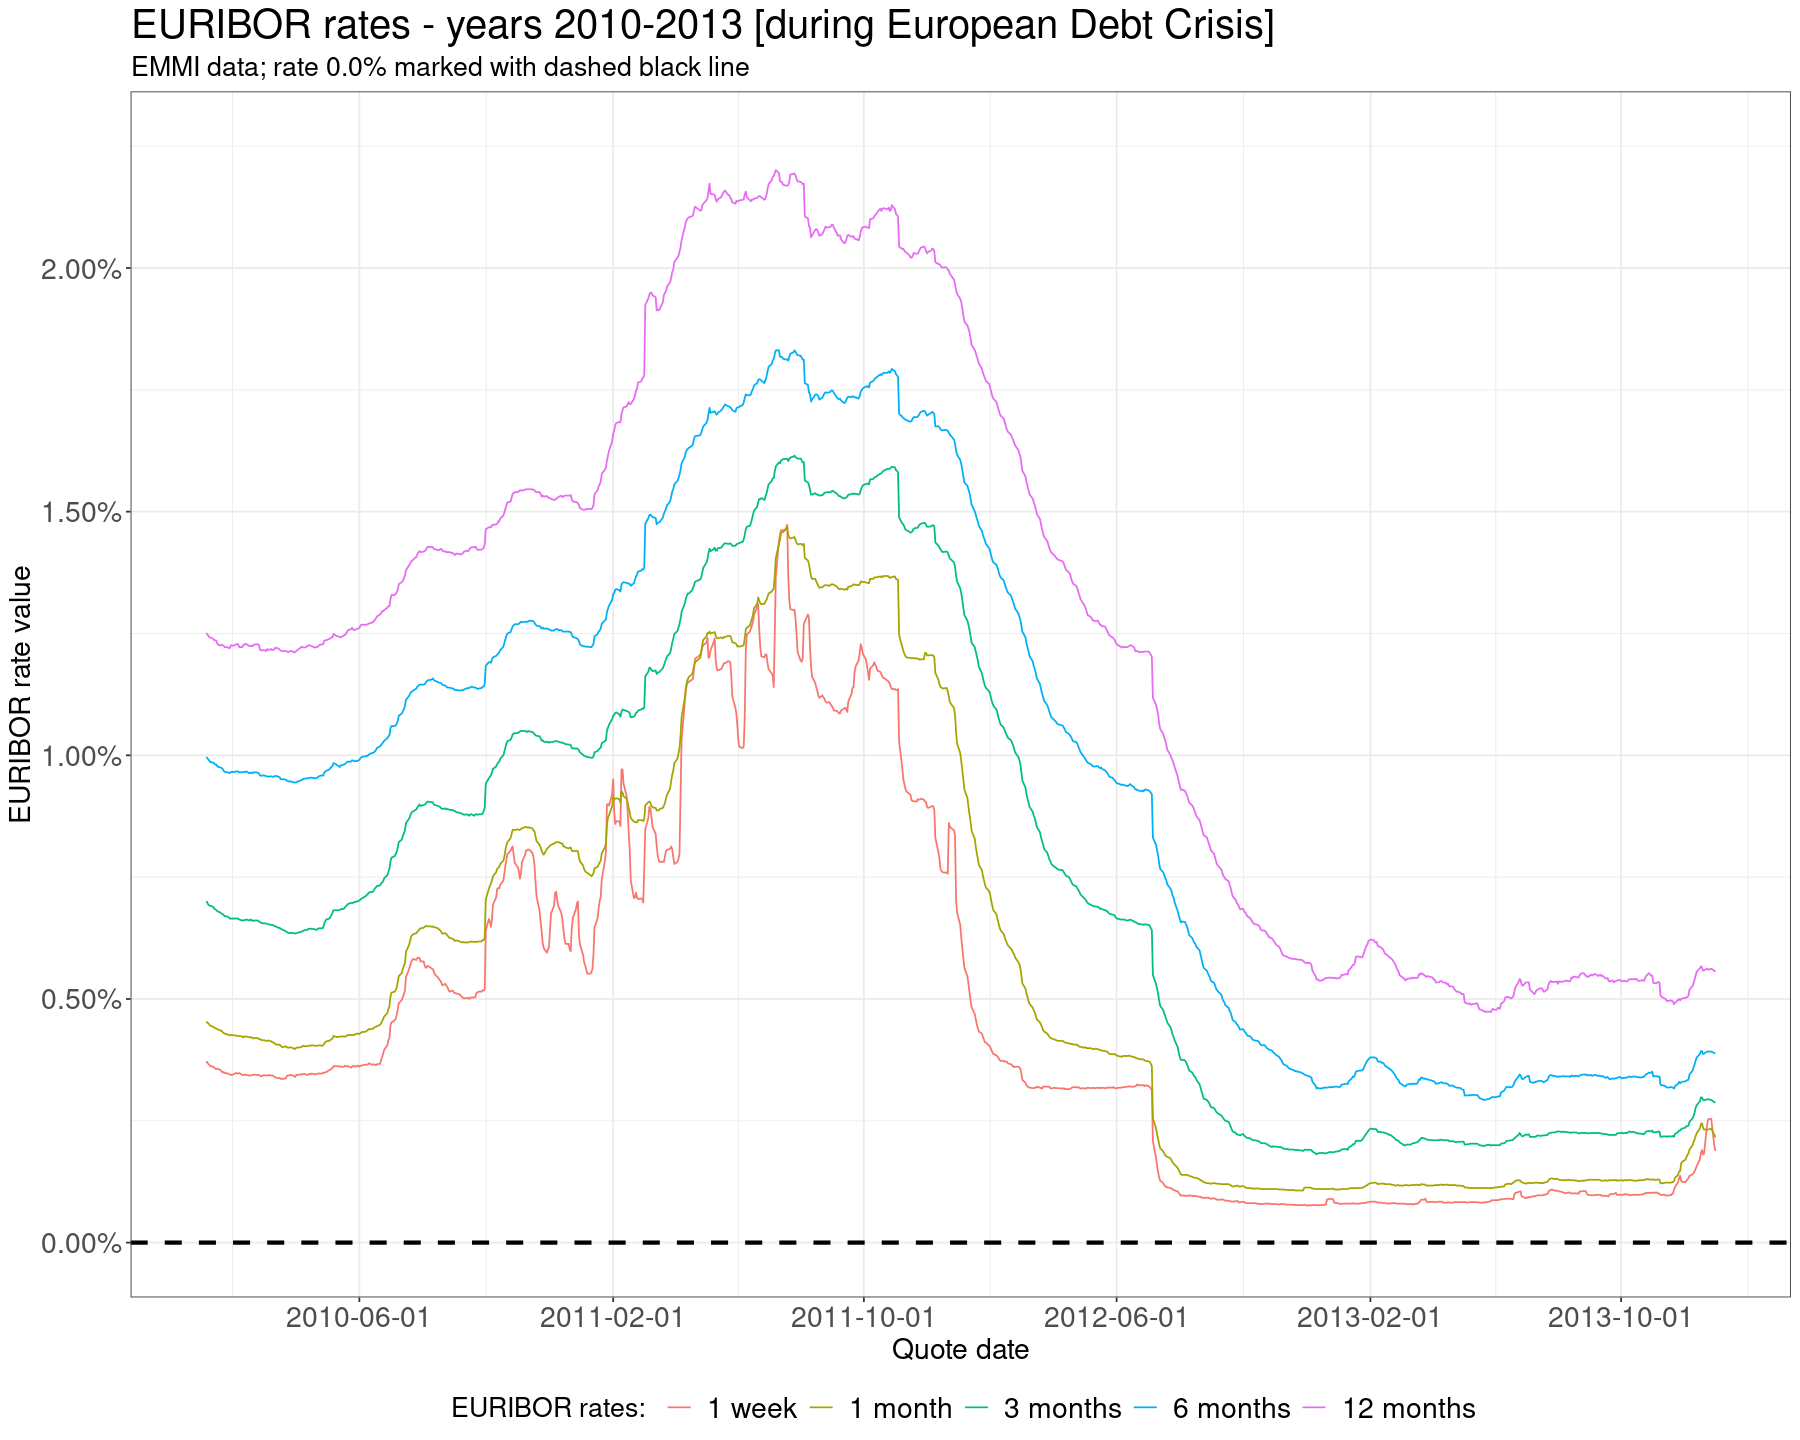

In [23]:
plotHistoryDuringEuroDebtCrisis

In [25]:
# 4. inspect more closely period since 2014 ------------------------------------
dtMeltedDataSince2014 <- dtMeltedData[lubridate::year(quote_date) >= 2014, ]
plotHistorySince2014 <- ggplot(
  data = dtMeltedDataSince2014,
  mapping = aes(x = quote_date, y = euribor_value, color = which_euribor)) +
  geom_line() + theme_bw() +
  theme(legend.position = "bottom") +
  xlab(label = "Quote date") + ylab(label = "EURIBOR rate value") +
  scale_y_continuous(labels = scales::percent) +
  ggtitle(label = "EURIBOR rates - since 2014",
          subtitle = "EMMI data; rates 0.6%, 0.0%, -0.6% marked with dashed balck lines") +
  scale_color_discrete(
    name = "EURIBOR rates: ",
    labels = c("1 week", "1 month", "3 months", "6 months", "12 months")
  ) + scale_x_date(breaks = "1 year") +
  geom_hline(yintercept = c(-0.006, 0.00, 0.006), color = "black", linetype = "dashed", size = 1.0) + plotStdTheme

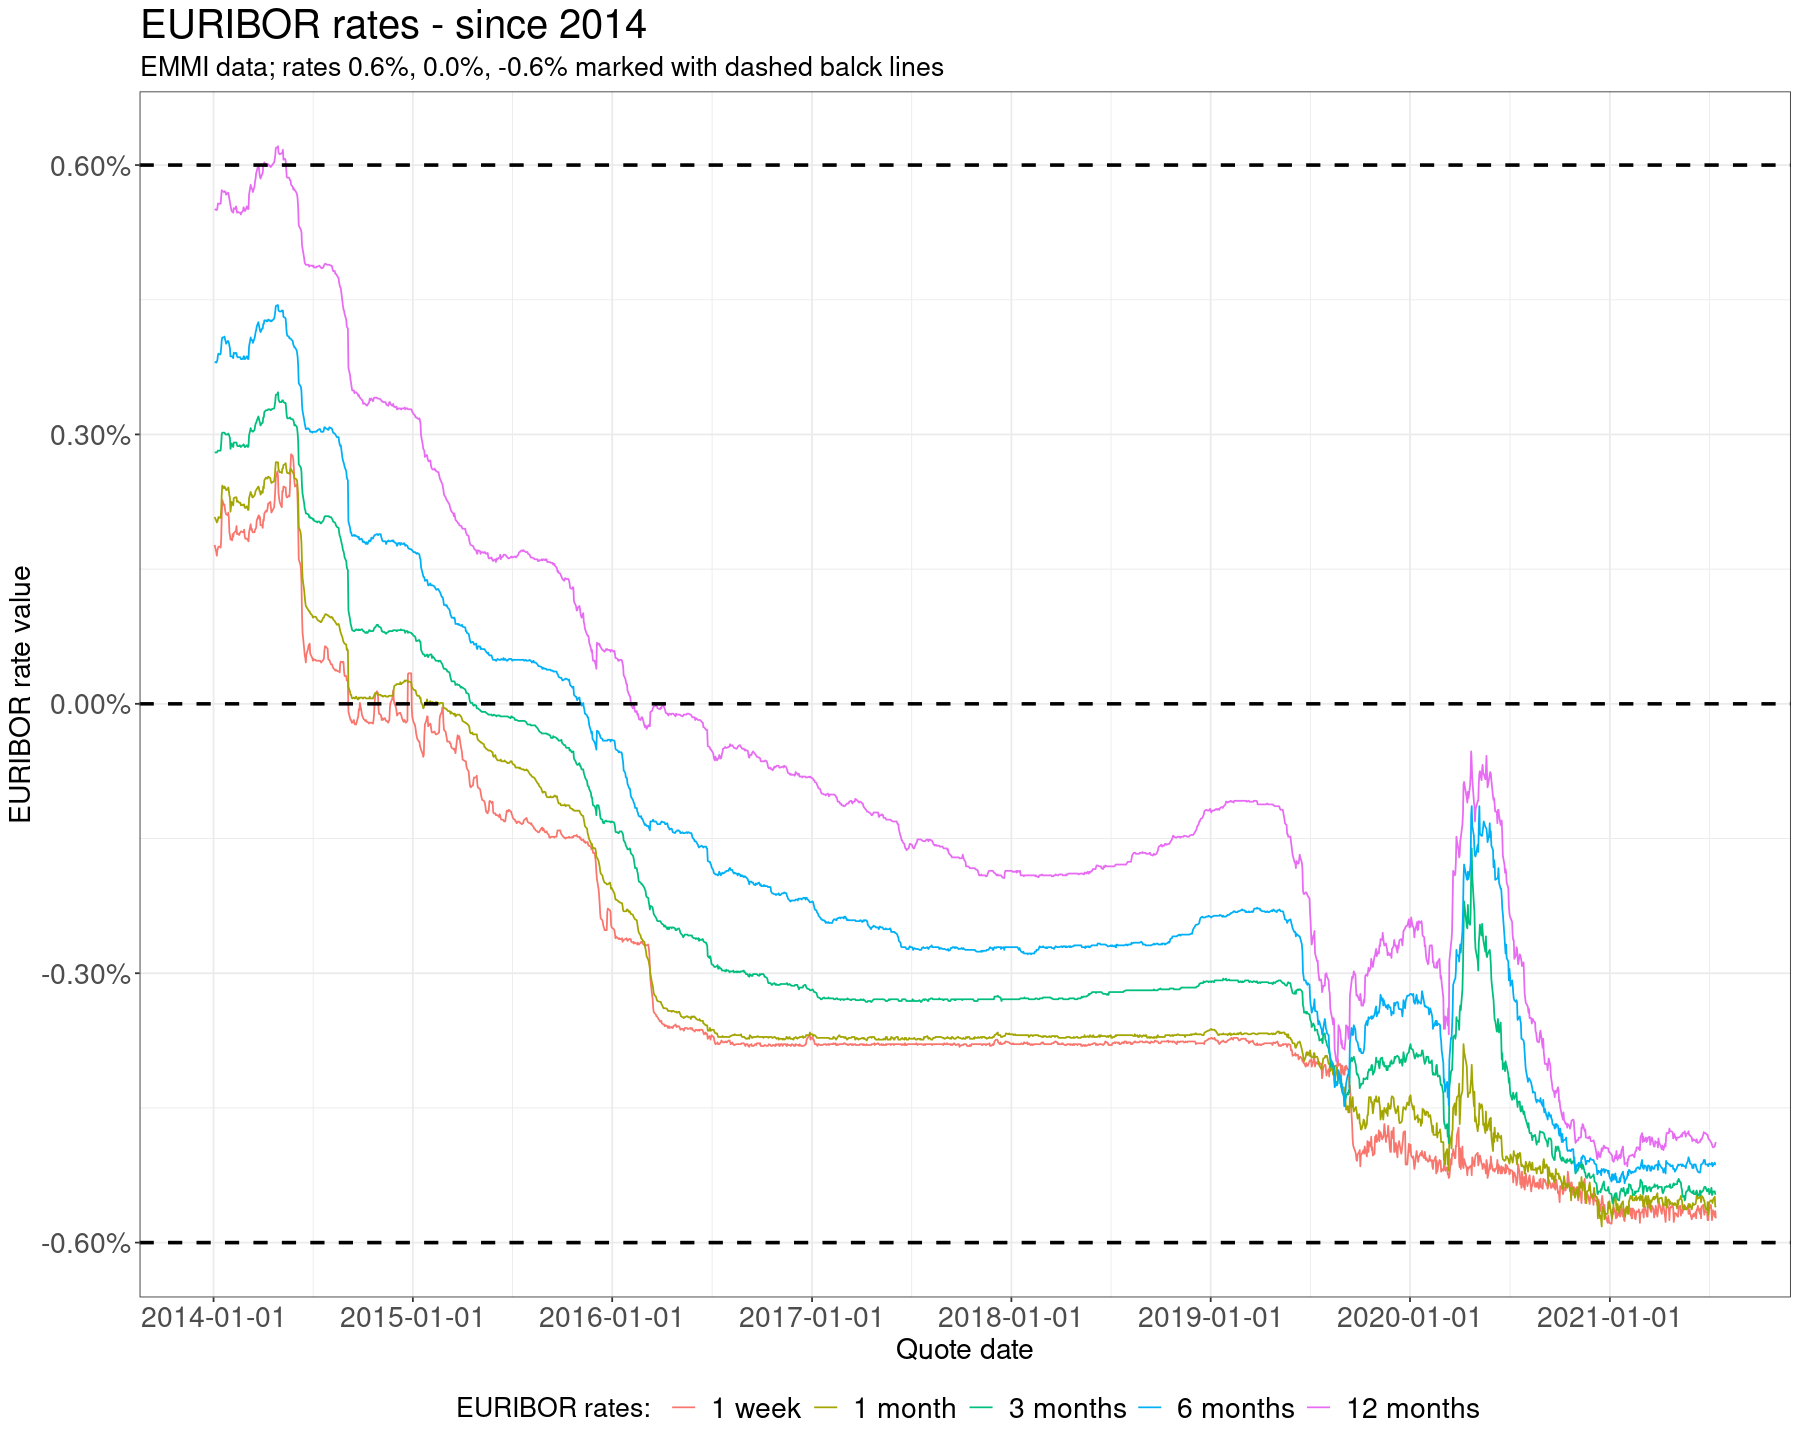

In [26]:
plotHistorySince2014

In [30]:
# 5. analysis of the World Financial Crisis (WFC) period - boxplots ------------
dtWfcData <- dtData[lubridate::year(quote_date) %in% c(2007, 2008, 2009), ]
dtMeltedWfcData <- data.table::melt.data.table(
  data = dtWfcData, id.vars = "quote_date", measure.vars = colnames(dtWfcData)[2:6],
  variable.name = "which_euribor", value.name = "euribor_value")
dtMeltedWfcData$euribor_value <- dtMeltedWfcData$euribor_value/100
plotBoxplotWfc <- ggplot(data = dtMeltedWfcData,
       mapping = aes(x = which_euribor, y = euribor_value, color = which_euribor)) +
  geom_boxplot() + theme_bw() +
  scale_x_discrete(
    name = "Which EURIBOR rate", labels = c("1 week", "1 month", "3 months", "6 months", "12 months")) +
  scale_y_continuous(labels = scales::percent, name = "EURIBOR value") +
  ggtitle(
    label = "Box plots of levels of EURIBOR rates in years 2007-2009",
    subtitle = "Note: this boxplot is NOT based on changes of rates but on their levels; crosshairs denote sample means"
  ) + stat_summary(fun = mean, geom = "point", shape = 10, size = 8) +
  theme(legend.position = "none") + plotStdTheme

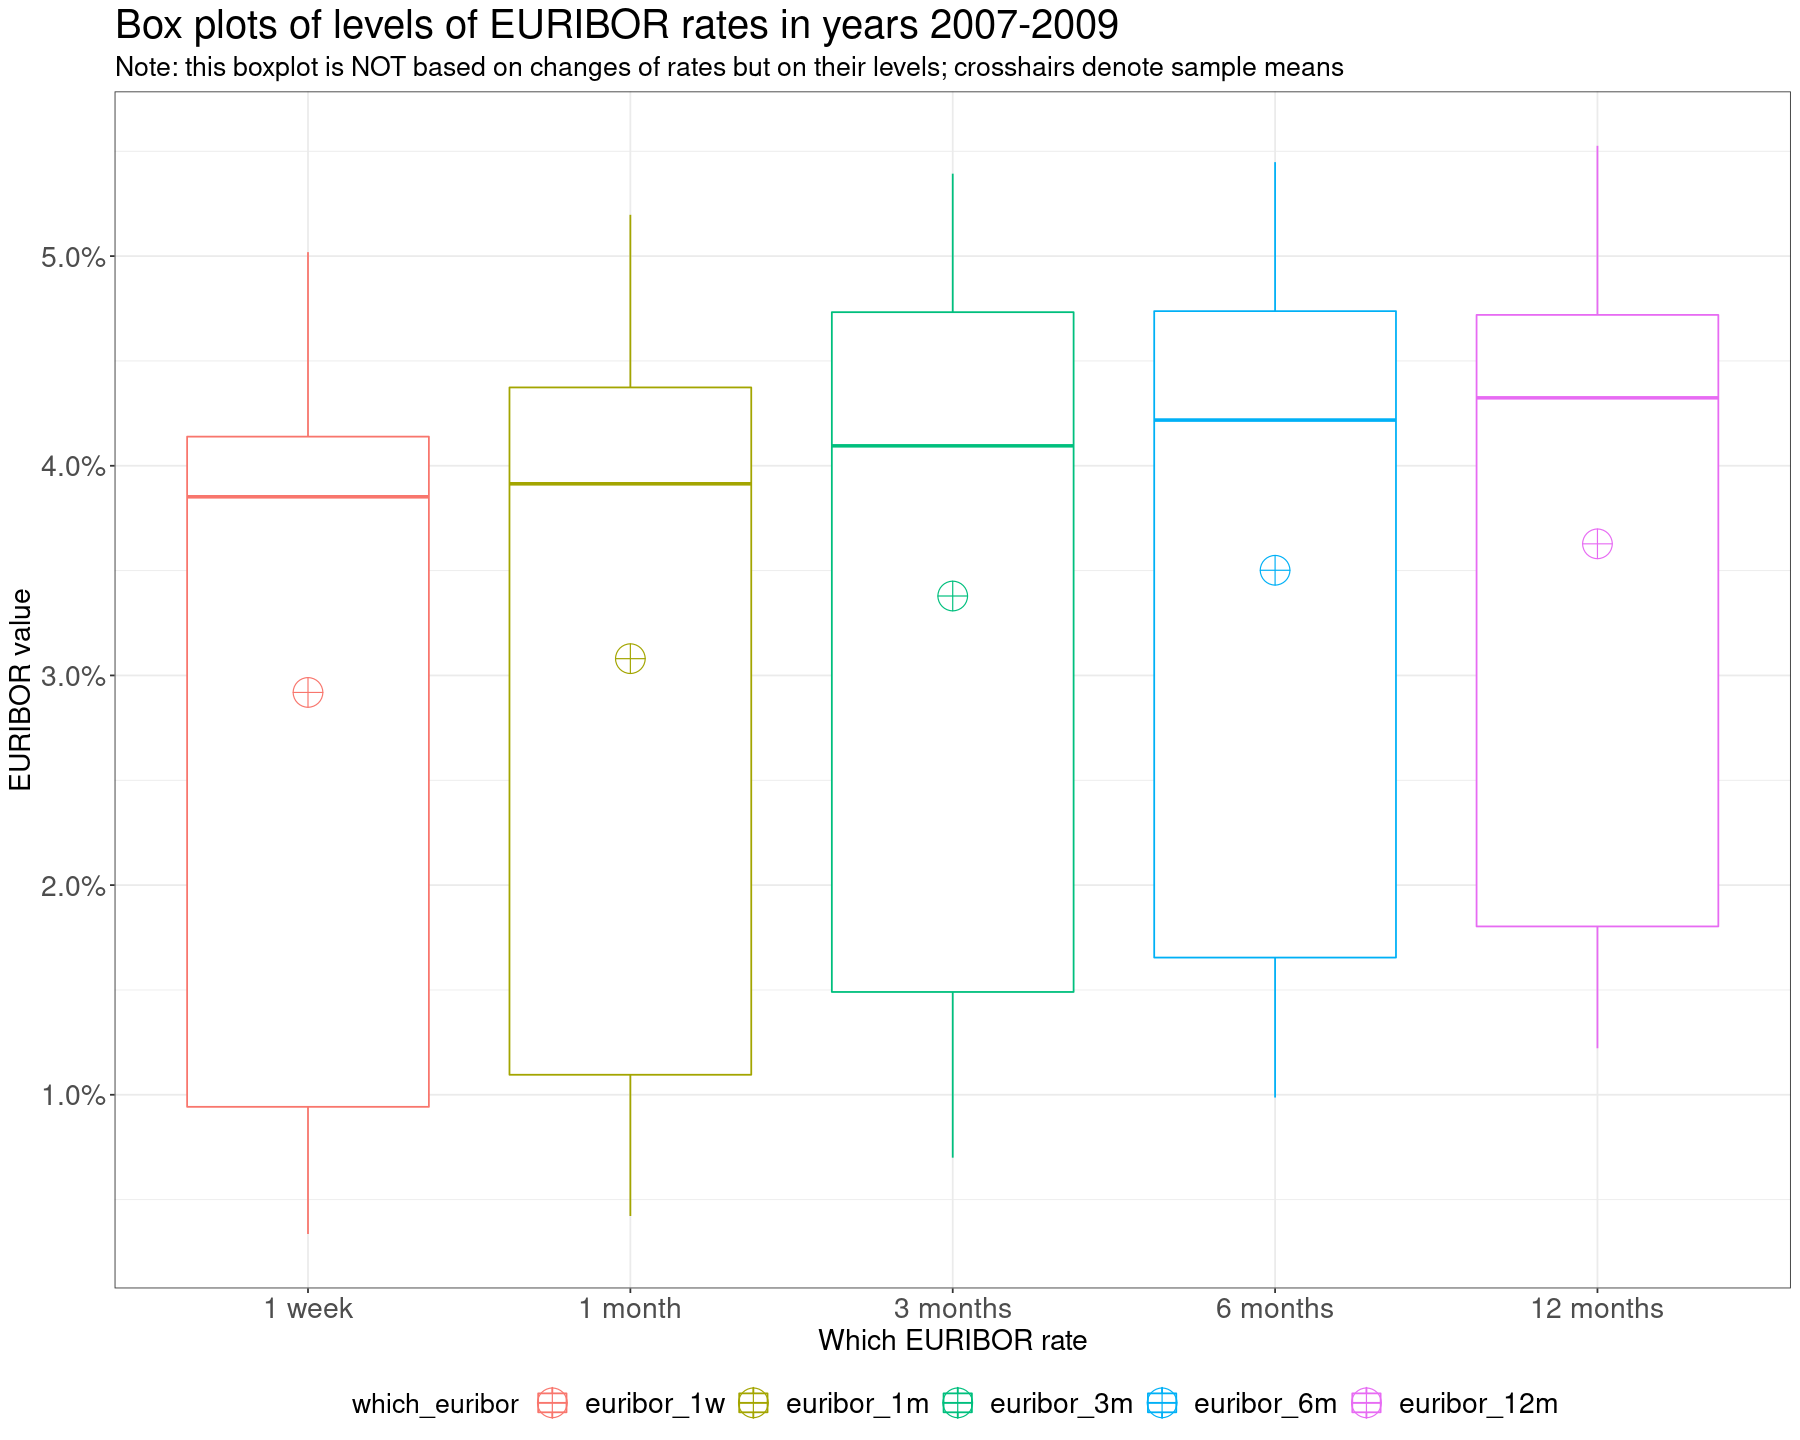

In [31]:
plotBoxplotWfc

In [35]:
# 6. counts of observations by year --------------------------------------------
# 6.1. quick overview of obs counts by year
dtData[, which_year := lubridate::year(quote_date)]
dtObsByYear <- dtData[, .N, by = which_year]
View(head(dtObsByYear))
plotObsCounts <- ggplot(data = dtData, mapping = aes(y = which_year)) +
  geom_bar(color = "steelblue", fill = "white") + theme_bw() +
  scale_y_continuous(breaks = seq(1998, 2021, 1)) +
  ylab(label = "Which year") +
  xlab(label = "Number of observations") +
  ggtitle(label = "Count of observations in the data set by year, 1998-2021") + plotStdTheme

which_year,N
<dbl>,<int>
1998,2
1999,261
2000,260
2001,255
2002,255
2003,253


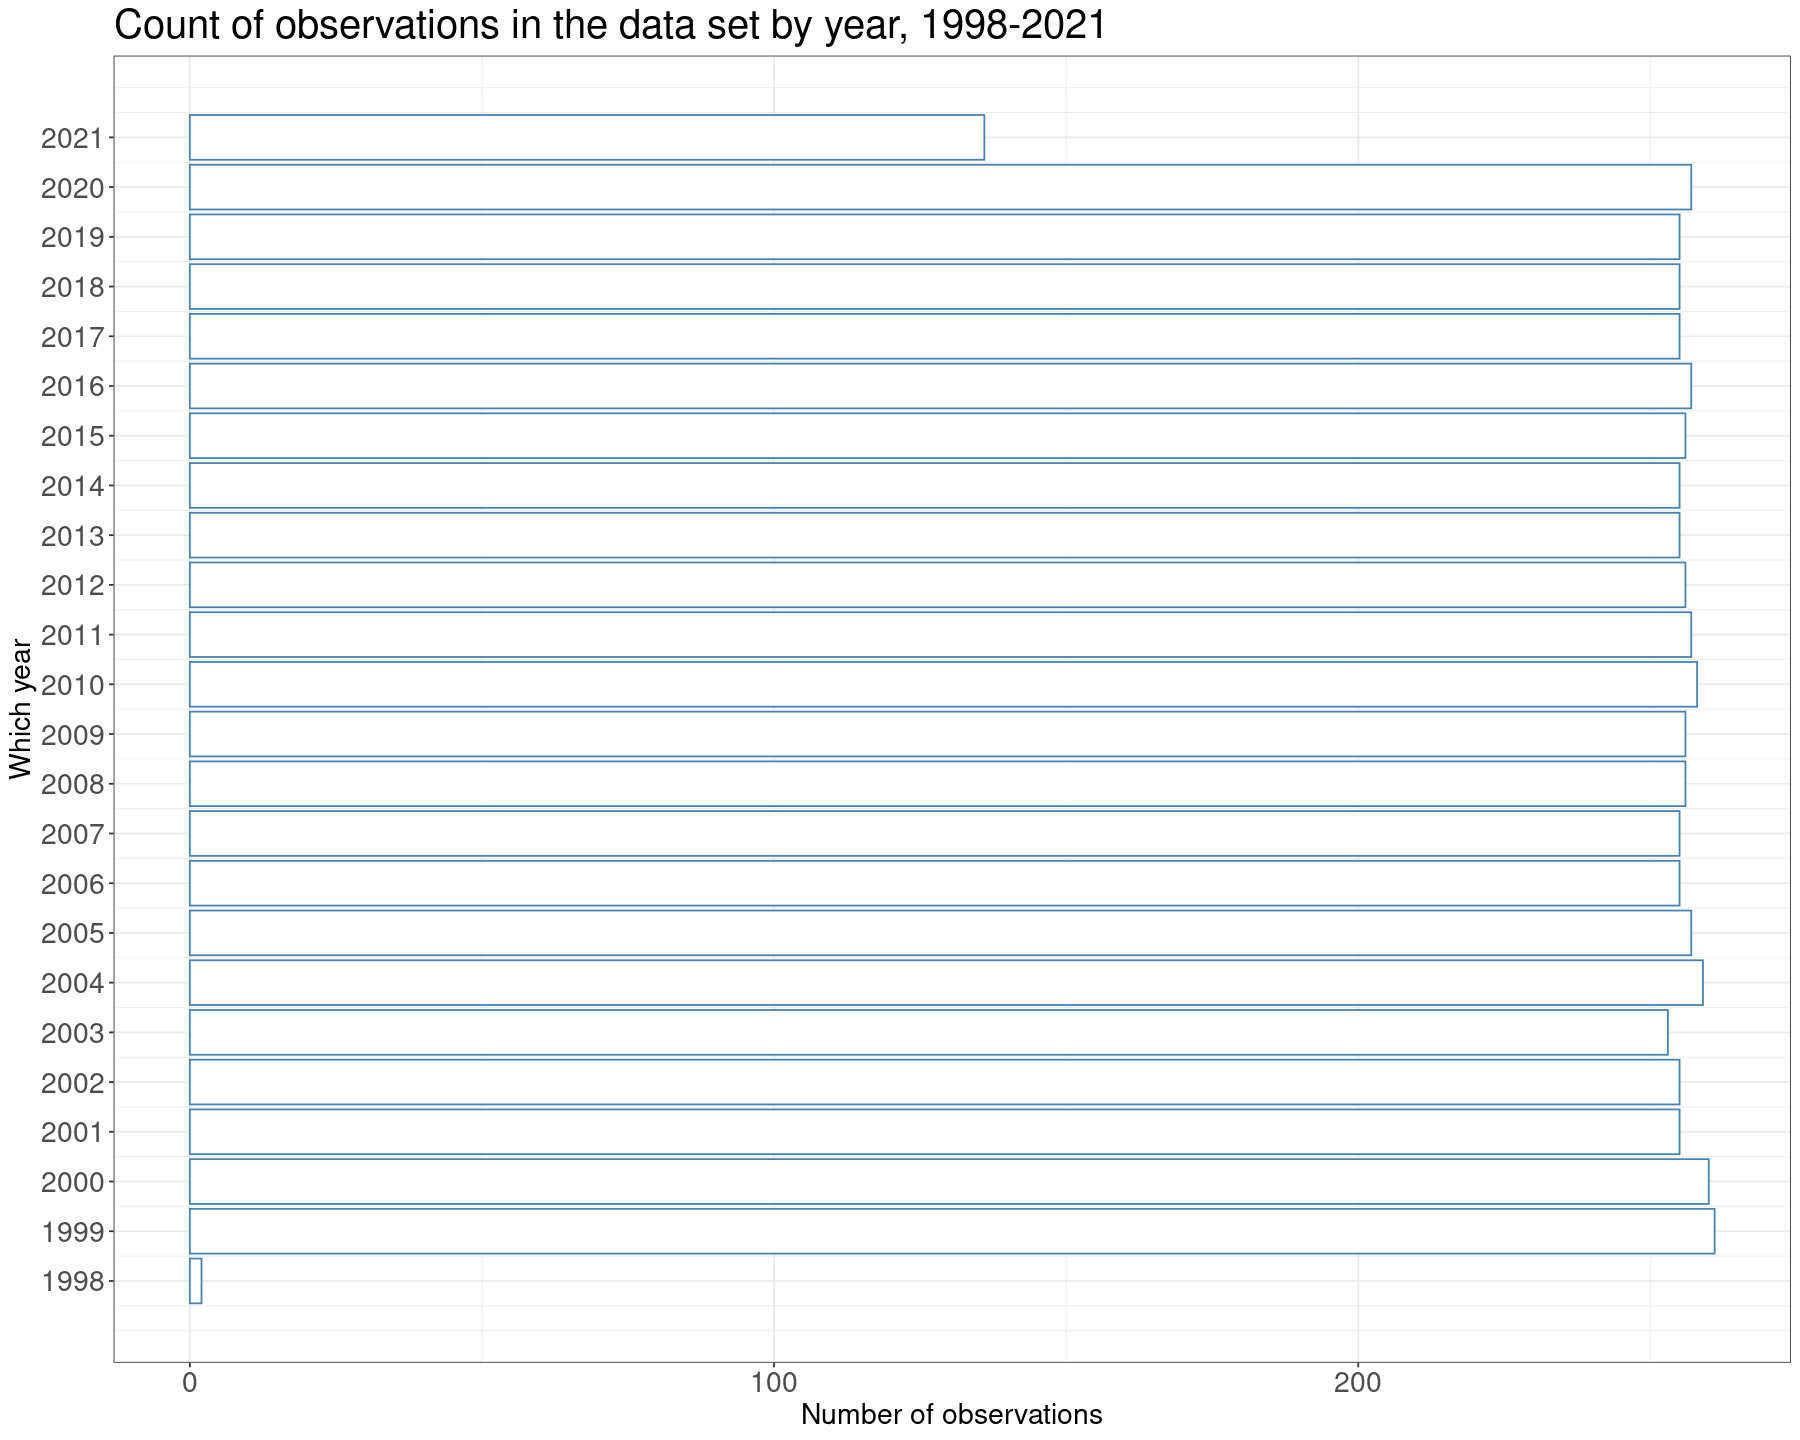

In [34]:
plotObsCounts
# dropping the data for years 1998, 2021

In [38]:
# 7. calculate and plot selected statistic over time ---------------------------
# 7.1. calculate summary stats in a long format
dtData <- data.table::copy(dtEuribor)
dtData[, which_year := lubridate::year(quote_date)]
dtData <- dtData[!(which_year %in% c(1998, 2021)), ]
cEuriborCols <- colnames(dtData)[2:6]
dtData[, (cEuriborCols) := lapply(X = .SD, function(x) x/100 ), .SD = cEuriborCols]
dtMaxSumm <- dtData[, c(lapply(X = .SD, FUN = max), list(which_stat = "max")),
  by = which_year, .SDcols = cEuriborCols]
dtMinSumm <- dtData[, c(lapply(X = .SD, FUN = min), list(which_stat = "min")),
                    by = which_year, .SDcols = cEuriborCols]
dtMedianSumm <- dtData[, c(lapply(X = .SD, FUN = median), list(which_stat = "median")),
                       by = "which_year", .SDcols = cEuriborCols]
dtSumm <- rbindlist(l = list(dtMaxSumm, dtMinSumm, dtMedianSumm))
# 7.2. plot the stats for 6M euribor by year
plotDescStats <-
  ggplot(data = dtSumm, mapping = aes(x = which_year, y = euribor_6m, color = which_stat)) +
  geom_line() + geom_point() + theme_bw() +
  theme(
    legend.position = "bottom"
  ) +
  xlab("Year") + ylab("EURIBOR rate value") +
  scale_y_continuous(labels = scales::percent, breaks = seq(-0.005, 0.05, 0.005)) +
  scale_x_continuous(breaks = seq(2000, 2020, 2)) +
  ggtitle(
    label = "Descriptive stats of 6M EURIBOR by year"
  ) + scale_color_discrete(
    name = "Which statistic: ", labels = c("maximum", "median", "minimum")) +
  geom_hline(yintercept = 0.00, linetype = "dashed", color = "black", size = 1) + plotStdTheme

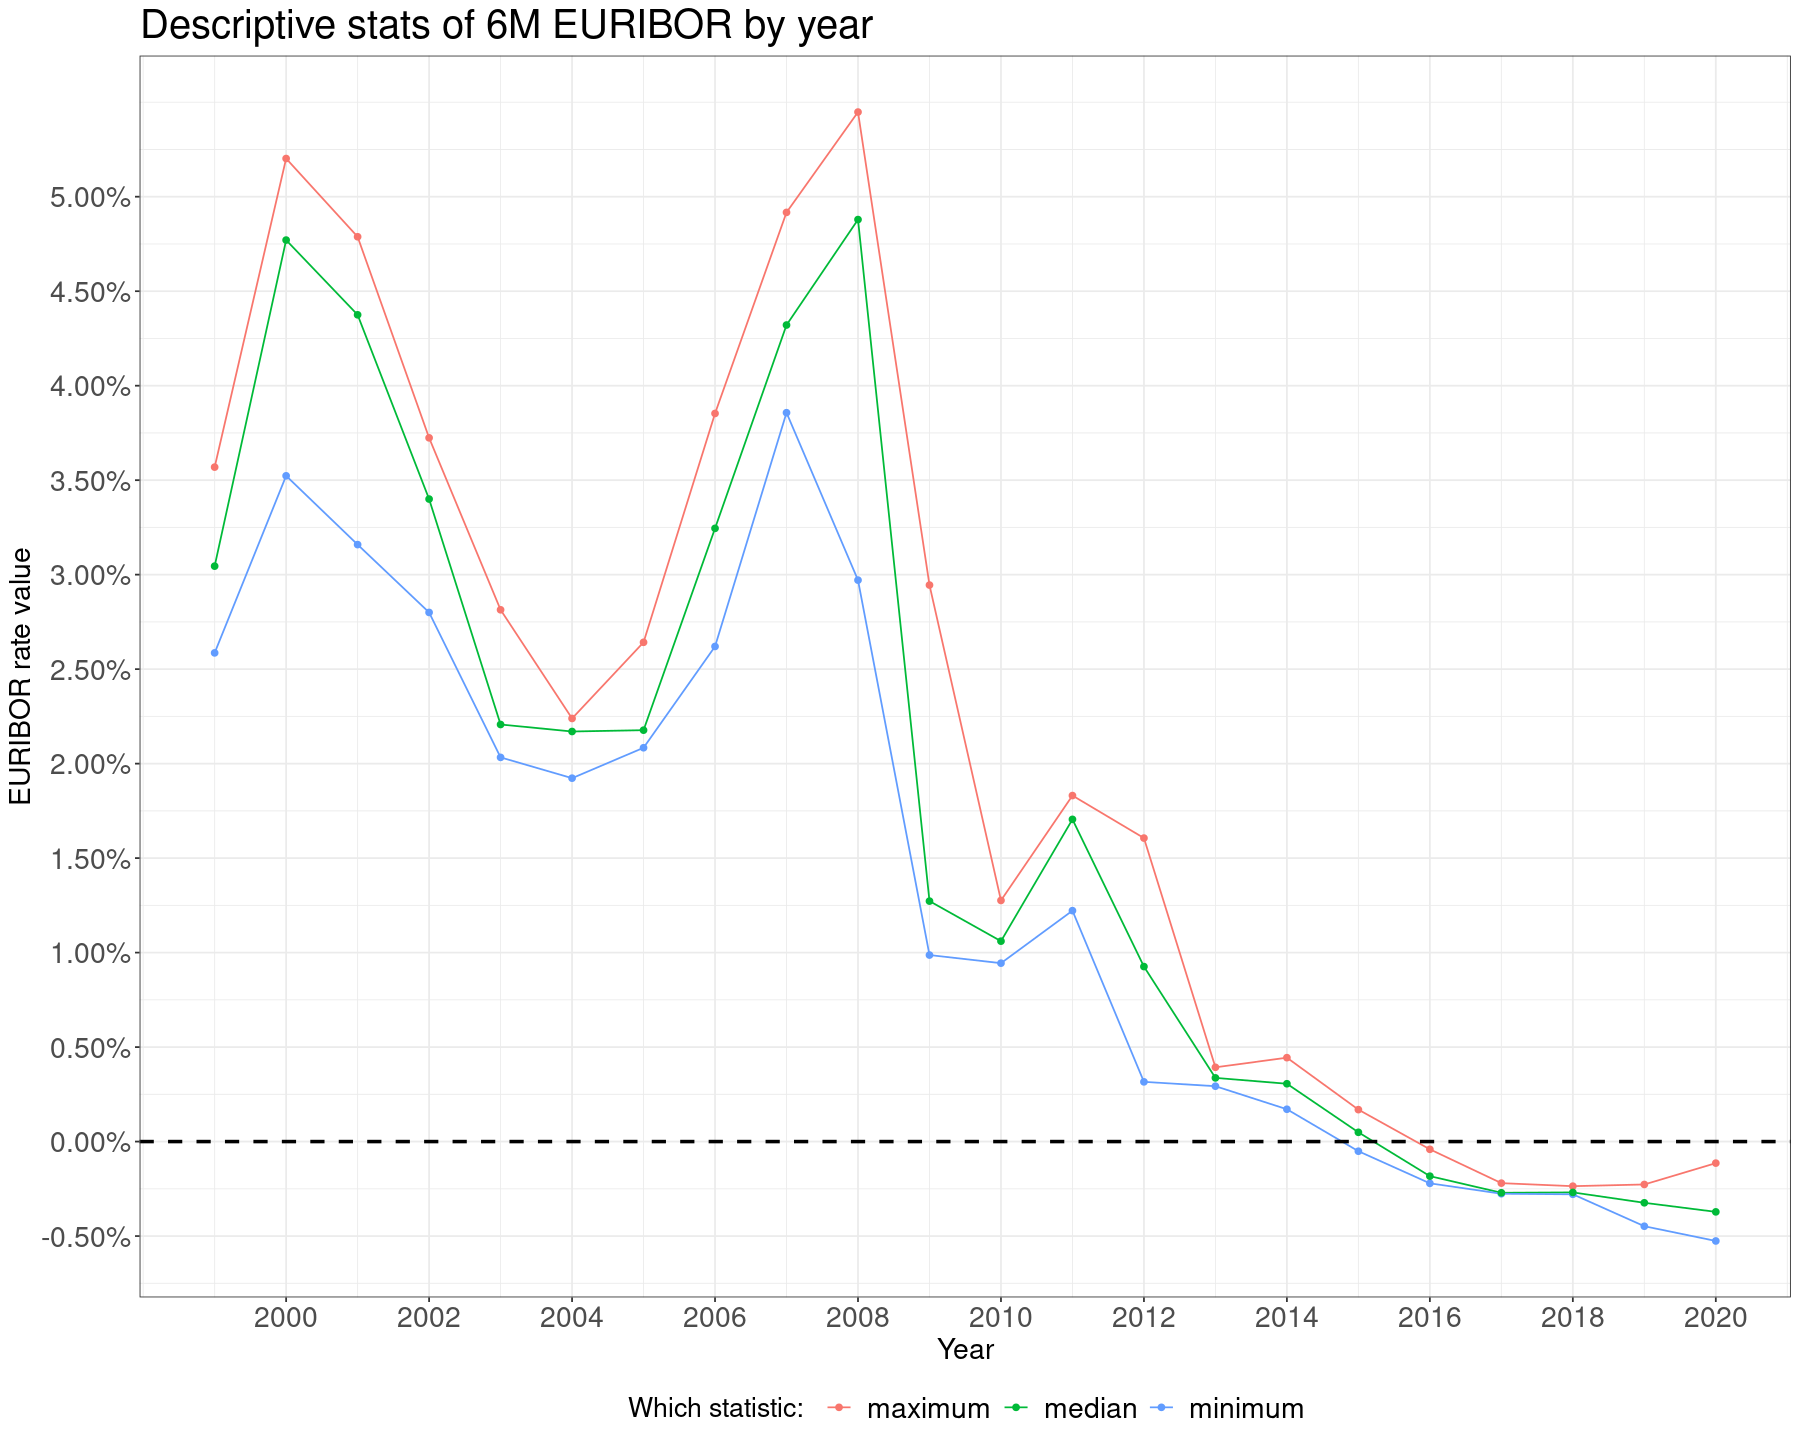

In [39]:
plotDescStats

In [40]:
# 8. analysis of changes of the rates ------------------------------------------
# 8.1. calculate daily increments of the rates
View(head(dtData))
dtDeltasData <- dtData[, c(list(quote_date = dtData$quote_date), stats::setNames(
  object = lapply(X = .SD, FUN = function(x) {
    c(NA, diff(x))
  }), nm = paste0("delta_", cEuriborCols)))
, .SD = cEuriborCols]
cEuriborDeltasCols <- paste0("delta_", cEuriborCols)

quote_date,euribor_1w,euribor_1m,euribor_3m,euribor_6m,euribor_12m,which_year
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1999-01-01,0.03245,0.03254,0.03245,0.03233,0.03213,1999
1999-01-04,0.03249,0.03242,0.03234,0.03223,0.03209,1999
1999-01-05,0.03241,0.03233,0.03222,0.03204,0.03187,1999
1999-01-06,0.03240,0.03226,0.03214,0.03197,0.03176,1999
1999-01-07,0.03237,0.03224,0.03206,0.03179,0.03158,1999
1999-01-08,0.03233,0.03217,0.03196,0.03166,0.03139,1999


In [41]:
# 8.2. split data set into short-term and mid-term data
dtShortRatesDeltasData <-
  dtDeltasData[, .(quote_date, delta_euribor_1w, delta_euribor_1m,
                   delta_euribor_3m)]
dtMidRatesDeltasData <-
  dtDeltasData[, .(quote_date, delta_euribor_6m, delta_euribor_12m)]

In [46]:
# 8.3. histogram for mid-term rates deltas
dtMeltedMidRatesDeltasData <- data.table::melt.data.table(
  data = dtMidRatesDeltasData, id.vars = "quote_date",
  measure.vars = c("delta_euribor_6m", "delta_euribor_12m"),
  variable.name = "which_euribor", value.name = "euribor_value"
)
View(head(dtMeltedMidRatesDeltasData))
View(tail(dtMeltedMidRatesDeltasData))

quote_date,which_euribor,euribor_value
<date>,<fct>,<dbl>
1999-01-01,delta_euribor_6m,NA
1999-01-04,delta_euribor_6m,-0.00010
1999-01-05,delta_euribor_6m,-0.00019
1999-01-06,delta_euribor_6m,-0.00007
1999-01-07,delta_euribor_6m,-0.00018
1999-01-08,delta_euribor_6m,-0.00013


quote_date,which_euribor,euribor_value
<date>,<fct>,<dbl>
2020-12-23,delta_euribor_12m,-2e-05
2020-12-24,delta_euribor_12m,1e-05
2020-12-28,delta_euribor_12m,-1e-05
2020-12-29,delta_euribor_12m,0e+00
2020-12-30,delta_euribor_12m,-4e-05
2020-12-31,delta_euribor_12m,0e+00


Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”


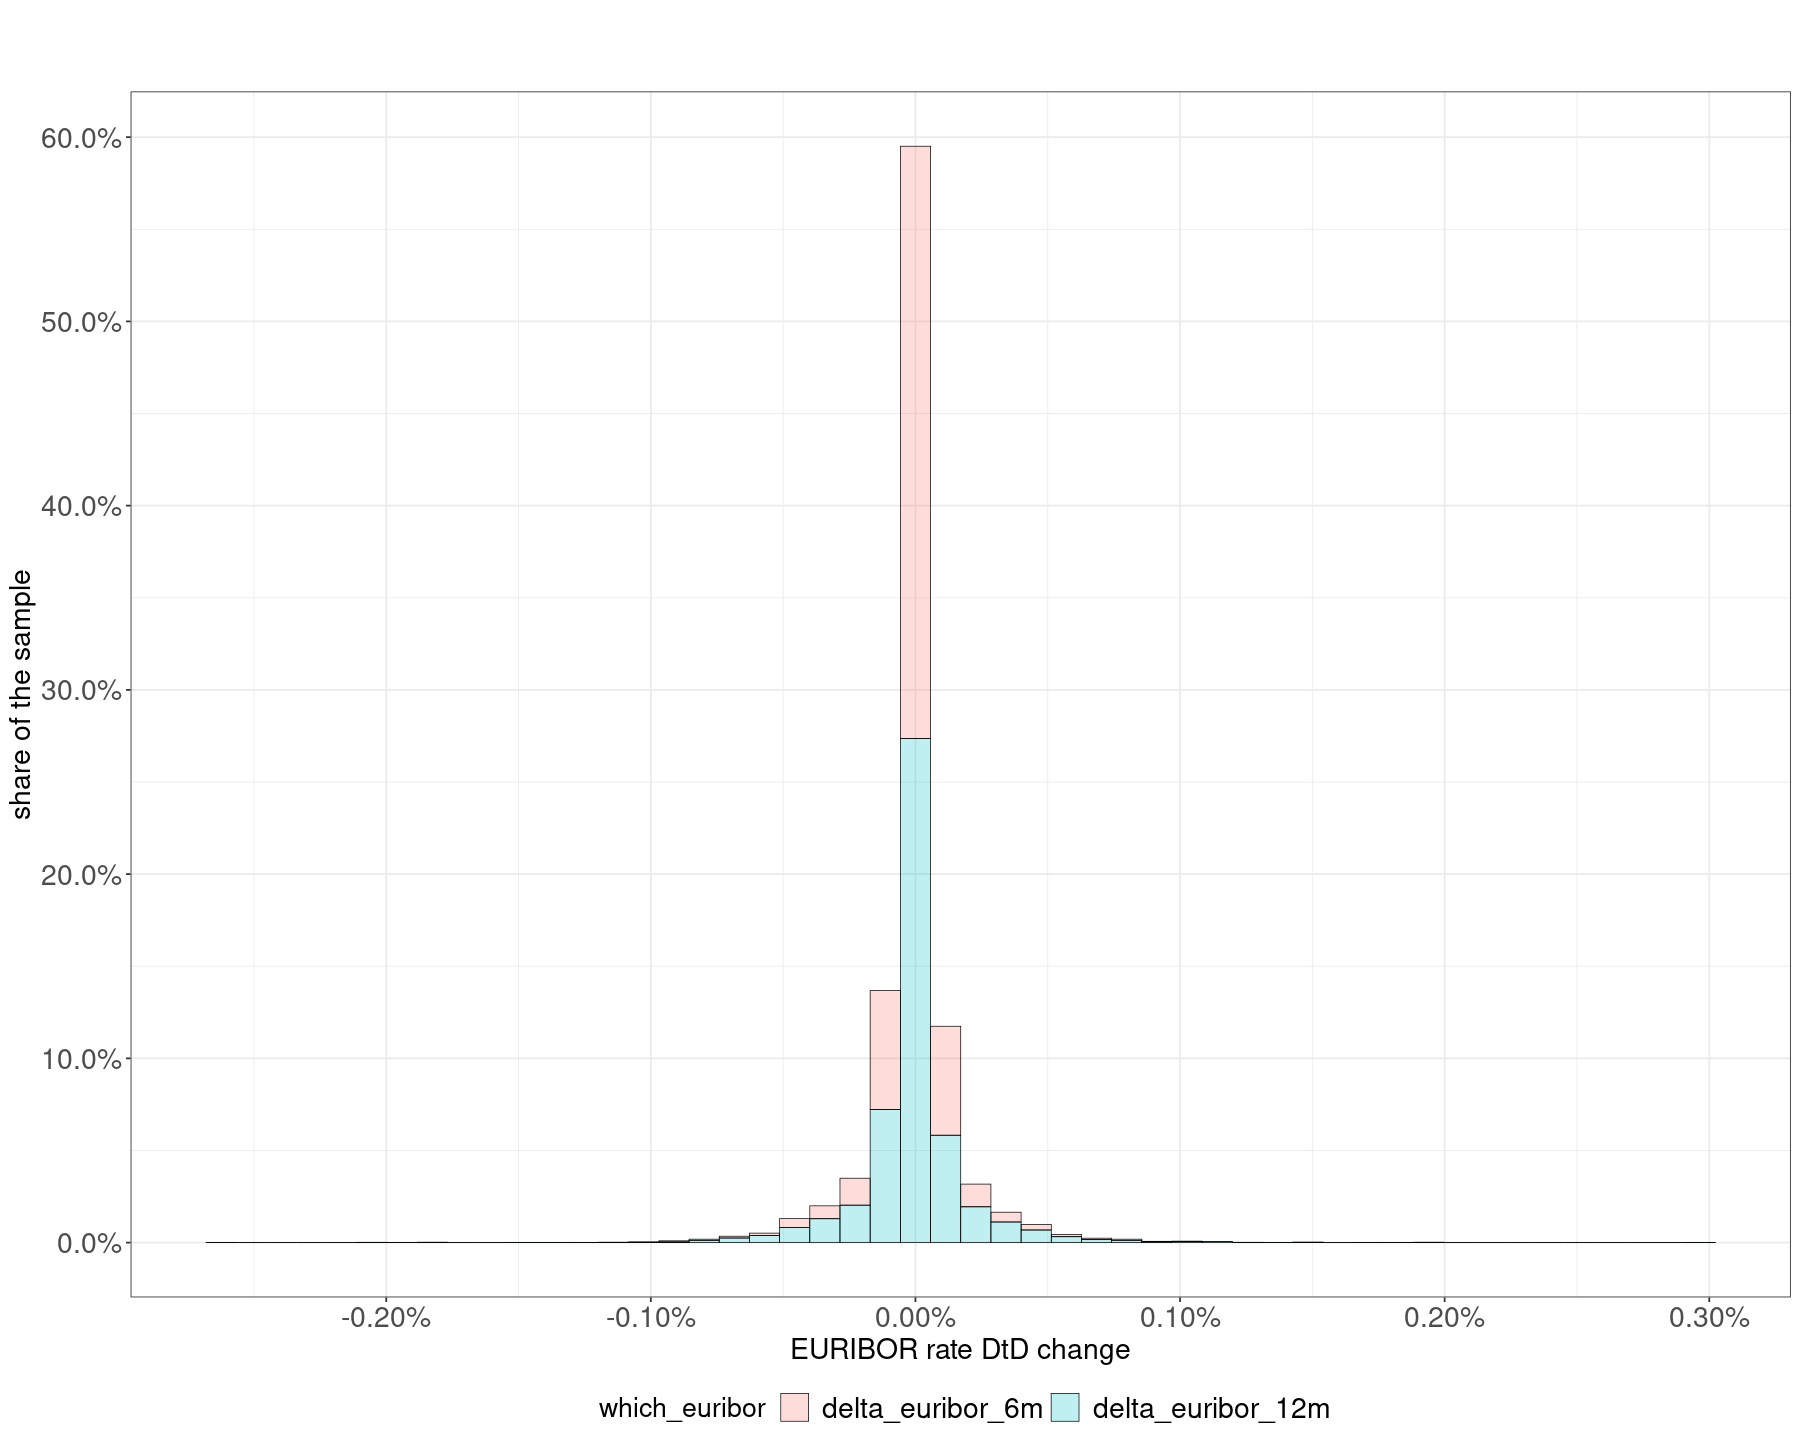

In [44]:
ggplot(data = dtMeltedMidRatesDeltasData, mapping = aes(x = euribor_value,
                                                        fill = which_euribor)) +
  geom_histogram(mapping = aes(y = ..count../sum(..count..)),
    bins = 50, alpha = 0.25, color = "black", size = 0.2) + theme_bw() +
  scale_x_continuous(labels = scales::percent) +
  scale_y_continuous(labels = scales::percent, breaks = seq(0.00, 0.6, 0.1)) +
  theme(legend.position = "bottom") +
  ggtitle(
    label = "",
    subtitle = ""
  ) + xlab("EURIBOR rate DtD change") + ylab(label = "share of the sample") + plotStdTheme